In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv(r"petrol_consumption.csv")
data

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


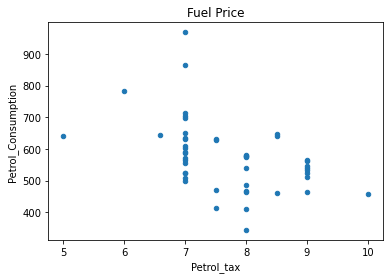

In [5]:
data.plot.scatter(x='Petrol_tax', y='Petrol_Consumption', title='Fuel Price');

In [6]:
data.corr()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


In [7]:
data.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [8]:
X = data['Petrol_tax'].values.reshape(-1, 1)
Y = data['Petrol_Consumption'].values.reshape(-1, 1)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state = 30)

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [11]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [12]:
regressor.intercept_

array([935.79466418])

In [13]:
regressor.coef_

array([[-48.14501931]])

In [14]:
Y_pred = regressor.predict(X_test)

In [15]:
data_preds = pd.DataFrame({'Actual': Y_test.squeeze(), 'Predicted': Y_pred.squeeze()})

In [16]:
data_preds

,Actual,Predicted
0,587,598.779529
1,577,550.634510
2,540,550.634510
3,632,598.779529
4,640,526.562000
5,580,550.634510
6,460,526.562000
7,554,598.779529
8,649,598.779529
9,968,598.779529


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [18]:
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)

In [19]:
mae

75.55859612272043

In [20]:
mse

16106.265866954851

In [21]:
rmse

126.91046397738388